In [10]:
from PIL import Image

#lsb_decoding
def getlen(newimg,d,w,h,W):
    data=list(d)
    new=[]
    for i in range(3,0,-1):
        new.append(data[(W*(h-1)+w)-i])
    imdta=iter(new)
    picl=[value for value in imdta.__next__()[:3]+imdta.__next__()[:3]+imdta.__next__()[:3]]
    nw=[]
    for i in range(0,8):
        y=picl[i]%2
        nw.append(y)
        n=0
    for j in range(7,-1,-1):
        n=n+nw[j]*pow(2,7-j)    
    return n


def decode_dcd(newimg,w,h,W):
    d=newimg.getdata()
    imdata=iter(d)
    l=getlen(newimg,d,w,h,W)
    nw=[]
    print("The decoded messege is : ",end='')
    for i in range(0,l):
        pix=[value for value in imdata.__next__()[:3]+imdata.__next__()[:3]+imdata.__next__()[:3]]
        c=0
        n=0
        for j in range(-2,-10,-1):
            n=n+(pix[j]%2)*pow(2,c)
            c+=1
        yoo=chr(n)
        print(yoo,end='')


def decode(w,h,W):
    from PIL import Image
    img=Image.open('extracted_lsb.png','r')
    newimg=img
    decode_dcd(newimg,w,h,W)


#image_extraction
def getLen():
    yo=Image.open('lsb_steg.png','r')
    w=yo.size[0]
    h=yo.size[1]
    
    return w,h


def base_forming(pixels):
    pic=Image.open('BOK2020.jpg','r')
    w,h=getLen()
    W=pic.size[0]
    (x,y)=(0,0)
    p=iter(pixels)
    tuples=[]
    
    for i in range(0,len(pixels)-2,3):
        test=[value for value in pixels[i:i+3]]
        tuples.append(tuple(test))  
        
      
    for i in range(len(tuples)):
        pic.putpixel((x,y),tuples[i])
        if(x==w-1):
            x=0
            if(y!=h-1):
                y=y+1
        else:
            x=x+1
           
    pic.save('extracted_lsb.png') 
    decode(w,h,W)


def make_base(bin):
    l=len(bin)
    pixels=[]
    p=0
    c=7
    
    for i in range(1,l):
        if(i==0):
            p=p+bin[i]*pow(2,c)
            c=c-1
            
        elif(i!=0)and(i%9!=0):
            p=p+bin[i]*pow(2,c)
            if(c>0):
                c=c-1
            elif(c==0):
                pixels.append(p)
                p=0
                c=7
                 
    base_forming(pixels)               


def extract_base(img):
    bin=[]
    pix=list(img.getdata())
    a,b=getLen()
    c=a*b*9
    w1=img.size[0]
    h1=img.size[1]
    
    
    for i in range(0,c):
        for j in range(0,3):
            if(pix[i][j]%2==0):
                bin.append(0)
            elif(pix[i][j]%2==1):
                bin.append(1)
    bin.append(0)
    
    for j in range(len(bin)-2,-1,-1):
        if(j>0):
            bin[j+1]=bin[j]
        elif(j==0):
            bin[1]=bin[0]
            bin[0]=0
    
    make_base(bin)


def img_extract():
    cover=Image.open('img_cover.png','r')
    newimg=cover
    
    extract_base(newimg)


#image_hiding
def gendata(data):
    newd=[]
    for i in data:
        newd.append(format(i[0],'08b'))
        newd.append(format(i[1],'08b'))
        newd.append(format(i[2],'08b'))
    return newd


def Modpix(pix):
    base=Image.open('lsb_steg.png','r')
    datalist=gendata(list(base.getdata()))
    lendata=len(datalist)
    imdata=iter(pix)
    
    for i in range(lendata):       
        pix=[value for value in imdata.__next__()[:3]+
                                imdata.__next__()[:3]+
                                imdata.__next__()[:3]]
        for j in range(0,8):
            if(datalist[i][j]=='0')and (pix[j]%2!=0):
                if(pix[j]%2!=0):
                    pix[j]-=1
            elif(datalist[i][j]=='1')and (pix[j]%2==0):
                pix[j]+=1
                
        pix=tuple(pix)
        yield pix[0:3]
        yield pix[3:6]
        yield pix[6:9]
  
  
def hiding(cvr_img):
    w=cvr_img.size[0]
    h=cvr_img.size[1]
    (x,y)=(0,0)
    for i in Modpix(cvr_img.getdata()):
        cvr_img.putpixel((x,y),i)
        if(x==w-1):
            x=0
            if(y!=h-2):
                y+=1
            else:
                raise ValueError("Image size is not sufficient,take larger image.")
        else:
            x+=1  

def hideimage():
    cover=Image.open('crocus.jpg','r')
    newimage=cover
    
    hiding(newimage)
    
    newimage.save('img_cover.png') 
    img_extract()
    

#lsb_encoding
def genData(data):
    newd=[]
    
    for i in data:
        newd.append(format(ord(i),'08b'))
    return newd    


def modpix(pix,data):
    datalist=genData(data)
    lendata=len(datalist)
    imdata=iter(pix)
    
    for i in range(lendata):
        pix=[value for value in imdata.__next__()[:3]+
                                imdata.__next__()[:3]+
                                imdata.__next__()[:3]]
        for j in range(0,8):
            if(datalist[i][j]=='0')and (pix[j]%2!=0):
                if(pix[j]%2!=0):
                    pix[j]-=1
            elif(datalist[i][j]=='1')and (pix[j]%2==0):
                pix[j]+=1
                
        pix=tuple(pix)
        yield pix[0:3]
        yield pix[3:6]
        yield pix[6:9]


def lengencode(newimg,data):
    
    l=len(data)
    lbin=format(l,'08b')
    d=list(newimg.getdata())
    new=[]
    for i in range(3,0,-1):
        new.append(d[len(d)-i])
        
    ndata=iter(new)
    pic=[value for value in ndata.__next__()[:3]+ndata.__next__()[:3]+ndata.__next__()[:3]]
    
    for i in range(0,8):
        if(pic[i]%2!=0)and(lbin[i]=='0'):
            pic[i]-=1
        elif(pic[i]%2==0)and(lbin[i]=='1'):
            pic[i]+=1
    pic=tuple(pic)
    yield pic[0:3]
    yield pic[3:6]
    yield pic[6:9]


def encode_enc(newimg,data):
    w=newimg.size[0]
    z=newimg.size[1]
    
    #encoding the main data:
    (x,y)=(0,0)
    for pixel in modpix(newimg.getdata(),data):
        newimg.putpixel((x,y),pixel)
        if(x==w-1):
            x=0
            if(y!=z-2):
                y+=1
            else:
                raise ValueError("Image size is not sufficient,take larger image.")
        else:
            x+=1
            
    #encoding the length of the data: 
    (i,j)=(w-3,z-1)
    for picl in lengencode(newimg,data):
        newimg.putpixel((i,j),picl)
        i+=1


def encode():
    img=Image.open('stegoimage.jpg','r')
    data=input("enterdata to be encoded:")
    
    if(len(data)==0):
        raise ValueError("Data is empty")
        
    newimg=img 
    encode_enc(newimg,data)
    
    #new_img_name=input("enter the name of the new image(with extension):")
    #newimg.save(new_img_name,str(new_img_name.split(".")[1].upper()))
    newimg.save('lsb_steg.png')
    hideimage()
    



<PIL.PngImagePlugin.PngImageFile image mode=RGB size=452x368 at 0x226B629FAC8>


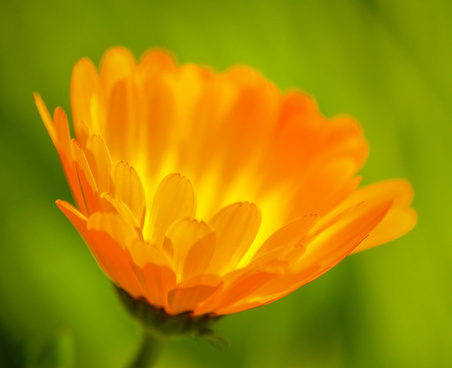

In [11]:
img=Image.open('lsb_steg.png','r')
print(img)
img


In [12]:
encode()

enterdata to be encoded: aritra


The decoded messege is : aritra